# Sentiment Analysis
We will use NLTK and Spacy library to cover our case study.
* Upvote and share our notebook.
* Like us on facebook: http://www.facebook.com/codemakerz

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import nltk
nlp = spacy.load("en_core_web_lg") # Loading english large corpus
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/imdb-movie-review-dataset/movie_data.csv


In [2]:
df_raw = pd.read_csv("/kaggle/input/imdb-movie-review-dataset/movie_data.csv")

So we can see we have two columns review and sentiment. Sentiment column tells the sentiment of the text, which mean whether your text is positive or negative. 
e.g; 
* He is a very good boy - This text has a positive sentiment.
* He is a very bad boy - It has negative sentiment.
* We will talk about sentiment later in detail. For now lets focus on EDA process.

In [3]:
df_raw.head()

,review,sentiment
0,This movie is just crap. Even though the direc...,0
1,Another detailed work on the subject by Dr Dwi...,1
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0
3,"Like with any movie genre, there are good gang...",0
4,I watched it with my mom and we were like...<b...,0


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49969 entries, 0 to 49968
Data columns (total 2 columns):
review       49969 non-null object
sentiment    49969 non-null int64
dtypes: int64(1), object(1)
memory usage: 780.9+ KB


In [5]:
df_raw.isnull().sum() # We do not have null values

review       0
sentiment    0
dtype: int64

Before any analysis, we should have question to ourself. It means what you are going to find in the given data?
Everyone has different questions. So there is not right way of analysis. What matters is your final output should be correct. There is not a single way to conclude one thing. So before start lets ask some question which we will solve in this analysis.
* How many positive and negative reviews are there?
* What are the most common words in positive and negative reviews?
* Find the sentiment of each review and compare it with existing sentiment value.

As there are only two columns, So there is no more things to analyse. If you have anything else in your mind which you want or can analyse, comment it below.

# EDA

In [6]:
df_counts = df_raw["sentiment"].value_counts().reset_index()
df_counts.head()


,index,sentiment
0,0,24987
1,1,24982


In [7]:
df_counts["index"] = df_counts["index"].apply(lambda x : 'Positive' if x == 1 else 'Negative' )
df_counts.head()

,index,sentiment
0,Negative,24987
1,Positive,24982


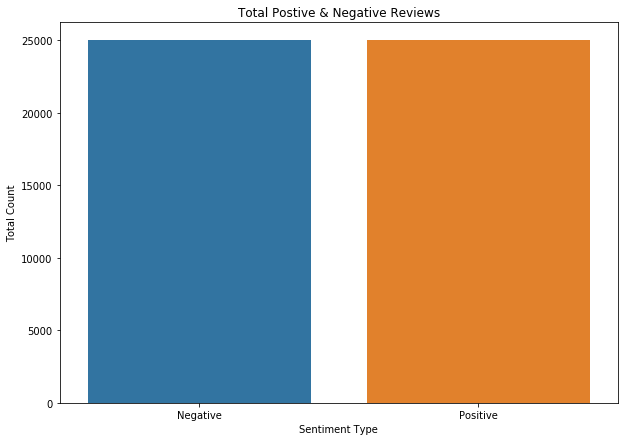

In [8]:
# So we can say that we almost have same number of reviews. That mean we have very good data.
plt.figure(figsize=(10, 7))
sns.barplot(data=df_counts, x='index', y='sentiment')
plt.xlabel("Sentiment Type");
plt.ylabel("Total Count");
plt.title("Total Postive & Negative Reviews");

In [9]:
# There may be a case where reviews are not null but empty/blank. Lets check for that
#for i, lb, rv in df_raw.itertuples()[0:10]:
#    print(i, lb, rv)

In [10]:
empty_review_index = []
for i, review, sentiment in df_raw.itertuples():
    # if review type is string
    if type(review) == str:
        #if review is empty space
        if review.isspace():
            # Appent its index to the list
            empty_review_index.append(i)

In [11]:
empty_review_index # So we do not have any empty review

[]

## Positive & Negative Token Count & Frequency Distribution

We will create a function which applies following action on reviews:
* Remove special characters
* Remove stop words
* Tokenization
* Apply lemmatization

In [12]:
import re # for regular expression

In [13]:
pos_token = [] # to save positive tokens
neg_token = [] # to save negative tokens
corpus=[]
noun = []
def process_reviews(df):
    for index, reviews, sentiment in df.itertuples():
        if type(reviews) == str:
            reviews = re.sub('[^a-zA-Z]', ' ', reviews)
            reviews = reviews.lower()
            doc = nlp(reviews)
            temp = []
            for token in doc:
                if not token.text.isspace():
                    if not token.is_stop and len(token.text) > 2:
                        if token.pos_ == 'NOUN':
                            noun.append(token.text)
                        if sentiment == 1:
                            pos_token.append(token.text)
                        else:
                           
                            neg_token.append(token.text)
                        temp.append(token.lemma_)
                        corpus.append(' '.join(temp))
            

In [14]:
#df_test = df_raw.head(20)
#df_test.head()

In [15]:
process_reviews(df_raw)

In [16]:
# all the positive token list
pos_token[0:10]

['detailed',
 'work',
 'subject',
 'dwivedi',
 'takes',
 'time',
 'pre',
 'partioned',
 'panjab',
 'dwivedi']

In [17]:
# all the negative token list
neg_token[0:10]

['movie',
 'crap',
 'directors',
 'claim',
 'culture',
 'bad',
 'directorial',
 'debut',
 'topic',
 'interesting']

In [18]:
from nltk import FreqDist

In [19]:
# preparing frequency distribution variables
freq_pos = FreqDist(pos_token)
freq_neg = FreqDist(neg_token)

In [20]:
freq_pos

FreqDist({'film': 42056, 'movie': 37826, 'like': 17698, 'good': 15019, 'great': 12950, 'story': 12918, 'time': 12732, 'people': 8716, 'love': 8684, 'best': 8502, ...})

In [21]:
freq_neg

FreqDist({'movie': 50113, 'film': 37563, 'like': 22453, 'bad': 14723, 'good': 14723, 'time': 12343, 'don': 10620, 'story': 10182, 'people': 9466, 'movies': 8312, ...})

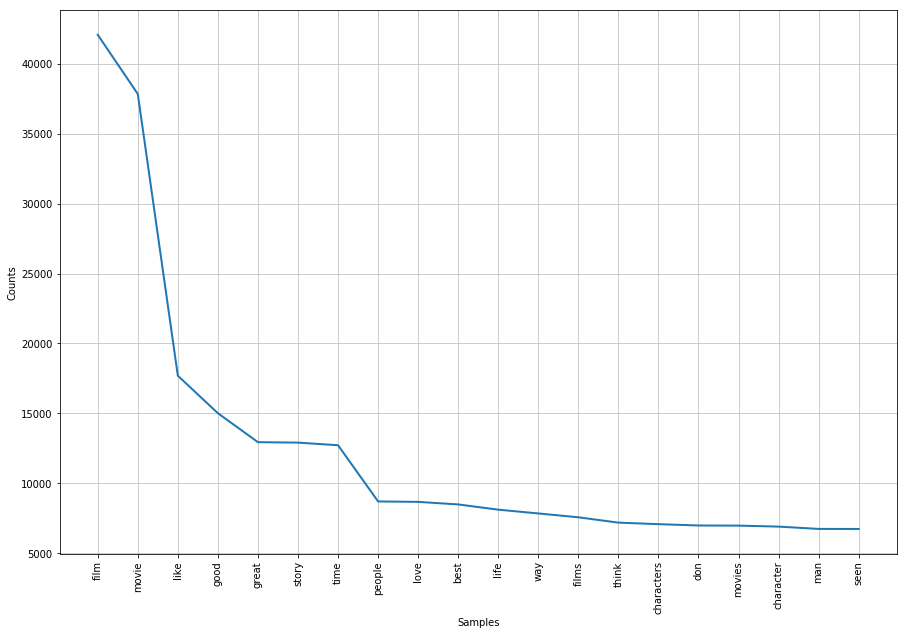

In [22]:
# Top 20 most repeated words in positive comments
plt.figure(figsize=(15, 10))
freq_pos.plot(20)

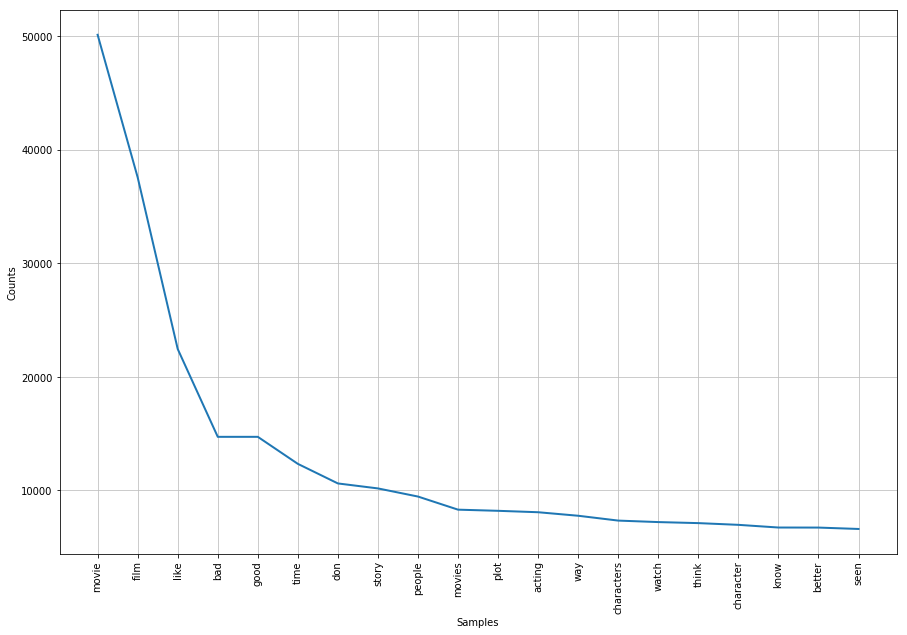

In [23]:
# top 20 most repeated words in negative comments
plt.figure(figsize=(15, 10))
freq_neg.plot(20)

In [24]:
# All the nouns used in our reviews. It will give you an idea like what are the famous keywords?
noun[0:10]

['movie',
 'directors',
 'culture',
 'debut',
 'topic',
 'acting',
 'fact',
 'amateurs',
 'thing',
 'film']

## Word Cloud

In [25]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

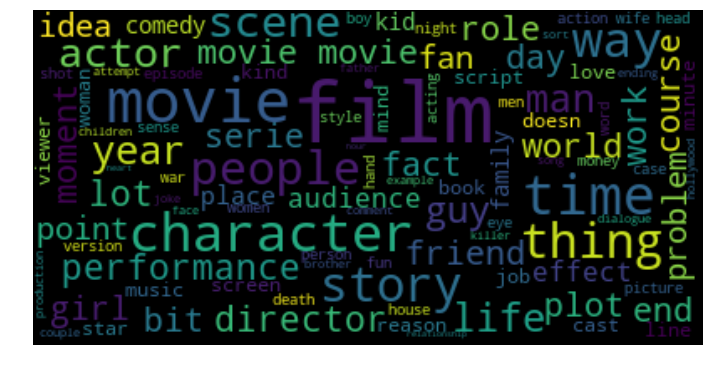

In [26]:
# Most famous nouns used in movie reviews

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(' '.join(noun))
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


# Sentiment Analysis

In [27]:
# import library for sntiment analysis.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/opt/conda/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [28]:
sm = SentimentIntensityAnalyzer()

In [29]:
# polarit_Scores acuallly gives one dictionary containing 4 valus. negative, positive, neutral and overall value
# compound. So you can see that below sentence has 0.4 neutral and 0.6 negative and overall -0.6696.
# - sign shows it is a negatvie sentence.
sm.polarity_scores("you are so bad")

{'neg': 0.6, 'neu': 0.4, 'pos': 0.0, 'compound': -0.6696}

In [30]:
# Lets try some more sentences. SO below you can see it contains both negative and positive feedback.
# so nltk is smart enough to undertand it. It actually calculate the score of each word and finally calulates
print(sm.polarity_scores("Star wars is amazing. But the the picturization is not good."))

{'neg': 0.337, 'neu': 0.449, 'pos': 0.213, 'compound': -0.2973}


In [31]:
# Now lets see a wierd thing here. I wrote the same sentense as above but score is different. can you say why?
# Actually if you observer i have capitalize the word AMAZING. So here nltk understands the we want to focus
# on word amazing. That is why below sentence is more positive than the above one. Lets try to capitalize
# more words.
print(sm.polarity_scores("Star wars is AMAZING. But the the picturization is not good."))

{'neg': 0.324, 'neu': 0.432, 'pos': 0.245, 'compound': -0.1212}


Few basic rcommendation
* Do not remove stop words form your sentence if you want to perform sentiment analysis. it will change the sentiment of the sentence. e.g.
I do not love you ----remove stop words -----> i love you ( So here we can see a complete different sentiment.
* Do not change the case of text before performing sentiment analysis as your know I LOVE YOU has more weightage than i love you.
* Do not remove special character like !!. I HATE YOU !!! has stronger sentiment than i hate you.

I think we understand here how nltk understand the sentiment of words.


In [32]:
# Lets apply sentiment analysis on our reviews.

In [33]:
df_raw.head()

,review,sentiment
0,This movie is just crap. Even though the direc...,0
1,Another detailed work on the subject by Dr Dwi...,1
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0
3,"Like with any movie genre, there are good gang...",0
4,I watched it with my mom and we were like...<b...,0


In [34]:
df_raw["score"] = df_raw["review"].apply(lambda review : sm.polarity_scores(review))

In [35]:
# extract only compound score
df_raw["sentiment_score"] = df_raw["score"].apply(lambda x: x["compound"]) 

In [36]:
df_raw.head()

,review,sentiment,score,sentiment_score
0,This movie is just crap. Even though the direc...,0,"{'neg': 0.122, 'neu': 0.783, 'pos': 0.095, 'co...",-0.7732
1,Another detailed work on the subject by Dr Dwi...,1,"{'neg': 0.032, 'neu': 0.892, 'pos': 0.075, 'co...",0.7750
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0,"{'neg': 0.065, 'neu': 0.806, 'pos': 0.129, 'co...",0.9692
3,"Like with any movie genre, there are good gang...",0,"{'neg': 0.125, 'neu': 0.762, 'pos': 0.113, 'co...",-0.9548
4,I watched it with my mom and we were like...<b...,0,"{'neg': 0.15, 'neu': 0.722, 'pos': 0.129, 'com...",-0.4368


In [37]:
# now lets change our sentiment_score column to binary value 0 or 1.
df_raw["sentiment_score"] = df_raw["sentiment_score"].apply(lambda x: 'pos' if x >= 0 else 'neg') 

In [38]:
# now lets change our sentiment_score column to binary value 0 or 1.
df_raw["sentiment"] = df_raw["sentiment"].apply(lambda x: 'pos' if x == 1 else 'neg') 

In [39]:
df_raw.head()

,review,sentiment,score,sentiment_score
0,This movie is just crap. Even though the direc...,neg,"{'neg': 0.122, 'neu': 0.783, 'pos': 0.095, 'co...",neg
1,Another detailed work on the subject by Dr Dwi...,pos,"{'neg': 0.032, 'neu': 0.892, 'pos': 0.075, 'co...",pos
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,neg,"{'neg': 0.065, 'neu': 0.806, 'pos': 0.129, 'co...",pos
3,"Like with any movie genre, there are good gang...",neg,"{'neg': 0.125, 'neu': 0.762, 'pos': 0.113, 'co...",neg
4,I watched it with my mom and we were like...<b...,neg,"{'neg': 0.15, 'neu': 0.722, 'pos': 0.129, 'com...",neg


In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [41]:
accuracy_score(df_raw["sentiment"], df_raw["sentiment_score"])

0.6942104104544817

In [42]:
# so we can see we have an accuracy score of 69% which is good in sentiment analysis. Sentiment analysis is not 
# very easy for most of the models as you can not predict srcasm in text. Many people write review as sarcasm,
# which is very difficult or impossible to predict. example:

sm.polarity_scores('Yaaa.. You said it was a good movie... :/')

{'neg': 0.212, 'neu': 0.531, 'pos': 0.257, 'compound': 0.128}

In [43]:
# In above example i wrote a sarcasm followed by a crap face text smiley but for computer program its just a 
# special characted. So here it doesnt understand the sarcasm. That is why because of these kind of exceptions
# 69% accuracy will be considered as fine number.

Thank you so much.. Upvote if it helps you.